<a href="https://colab.research.google.com/github/zahraniayudyaa/TUGAS-ML/blob/main/ch_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Pengenalan Decision Trees**
---
Decision Trees adalah algoritma pembelajaran mesin yang mirip dengan diagram alur (flowchart) untuk mengambil keputusan. Mereka membagi data menjadi subset berdasarkan nilai fitur tertentu. Setiap keputusan membentuk cabang, dan hasil akhirnya adalah daun (leaf) yang berisi prediksi. Kelebihan Decision Trees:
* Dapat menangani data kategorikal dan numerik
* Tidak memerlukan scaling/normalisasi data
* Mudah diinterpretasikan (model white-box)
* Dapat digunakan untuk klasifikasi dan regresi

Decision Trees menjadi dasar untuk algoritma ensemble yang lebih kuat seperti Random Forests dan Gradient Boosting.

# **2. Melatih dan Memvisualisasikan Decision Tree**
---
Decision Tree membagi data berdasarkan fitur dan threshold tertentu. Setiap node merepresentasikan keputusan, dan daun (leaf) merepresentasikan hasil prediksi. Gini impurity digunakan untuk mengukur kemurnian node.

Kode di bawah melatih Decision Tree pada dataset iris dengan maksimal kedalaman 2:

In [1]:
# Cell 1: Import libraries and load data
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load iris dataset
iris = load_iris()
X = iris.data[:, 2:]  # petal length and width
y = iris.target

# Train Decision Tree with max_depth=2
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

# Cell 2: Export tree visualization
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

# **3. Membuat Prediksi**
---
Prediksi dilakukan dengan menelusuri pohon dari akar ke daun. Proses prediksi melibatkan:
* Mulai dari root node (paling atas)
* Evaluasi kondisi: Cek apakah fitur memenuhi kondisi split
* Turun ke child node: Pilih cabang kiri (True) atau kanan (False)
* Ulangi hingga mencapai leaf node
* Hasil prediksi: Kelas mayoritas di leaf node tersebut

In [2]:
# Cell 3: Make predictions
# Example 1: Flower with petal length < 2.45 cm
sample1 = [[1.5, 0.2]]  # petal length = 1.5 cm, width = 0.2 cm
pred1 = tree_clf.predict(sample1)
prob1 = tree_clf.predict_proba(sample1)
print(f"Sample 1 [1.5, 0.2]: Predicted class = {iris.target_names[pred1[0]]}")
print(f"Probabilities: {prob1}")

# Example 2: Flower with petal length > 2.45 cm and petal width < 1.75 cm
sample2 = [[5.0, 1.5]]  # petal length = 5.0 cm, width = 1.5 cm
pred2 = tree_clf.predict(sample2)
prob2 = tree_clf.predict_proba(sample2)
print(f"\nSample 2 [5.0, 1.5]: Predicted class = {iris.target_names[pred2[0]]}")
print(f"Probabilities: {prob2}")

# Example 3: Flower with petal length > 2.45 cm and petal width > 1.75 cm
sample3 = [[6.0, 2.0]]  # petal length = 6.0 cm, width = 2.0 cm
pred3 = tree_clf.predict(sample3)
prob3 = tree_clf.predict_proba(sample3)
print(f"\nSample 3 [6.0, 2.0]: Predicted class = {iris.target_names[pred3[0]]}")
print(f"Probabilities: {prob3}")

Sample 1 [1.5, 0.2]: Predicted class = setosa
Probabilities: [[1. 0. 0.]]

Sample 2 [5.0, 1.5]: Predicted class = versicolor
Probabilities: [[0.         0.90740741 0.09259259]]

Sample 3 [6.0, 2.0]: Predicted class = virginica
Probabilities: [[0.         0.02173913 0.97826087]]


# **4. The CART Training Algorithm**
---
Scikit-Learn menggunakan algoritma CART (Classification and Regression Tree) yang bekerja dengan:
* Mencari pasangan (feature k, threshold t_k) yang menghasilkan subset paling murni
* Membagi data secara rekursif hingga kriteria berhenti terpenuhi

In [3]:
# Cell 4: Understanding node statistics
import numpy as np

def calculate_gini(y):
    """Calculate Gini impurity for a node"""
    if len(y) == 0:
        return 0

    # Calculate proportion of each class
    _, counts = np.unique(y, return_counts=True)
    proportions = counts / len(y)
    gini = 1 - np.sum(proportions ** 2)
    return gini

# Simulate the root node splitting
print("Root node statistics:")
print("samples = 150")
print("value = [50, 50, 50]  # 50 instances of each class")
print(f"Gini = {calculate_gini([0]*50 + [1]*50 + [2]*50):.3f}")

Root node statistics:
samples = 150
value = [50, 50, 50]  # 50 instances of each class
Gini = 0.667


# **5. Gini Impurity dan Entropy**
---

In [4]:
# Cell 5: Compare Gini and Entropy
from math import log2

# Create trees with different criteria
tree_gini = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=42)
tree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

tree_gini.fit(X, y)
tree_entropy.fit(X, y)

# Compare predictions
sample = [[5, 1.5]]
print(f"Sample: petal length=5cm, width=1.5cm")
print(f"Gini tree prediction: {iris.target_names[tree_gini.predict(sample)[0]]}")
print(f"Entropy tree prediction: {iris.target_names[tree_entropy.predict(sample)[0]]}")

# Calculate entropy for depth-2 left node (49 versicolor, 5 virginica)
p1 = 49/54
p2 = 5/54
entropy = -p1 * log2(p1) - p2 * log2(p2)
print(f"\nEntropy calculation for node with 49 versicolor, 5 virginica:")
print(f"p1 = {p1:.3f}, p2 = {p2:.3f}")
print(f"Entropy = -({p1:.3f} * log2({p1:.3f}) + {p2:.3f} * log2({p2:.3f})) = {entropy:.3f}")

Sample: petal length=5cm, width=1.5cm
Gini tree prediction: versicolor
Entropy tree prediction: versicolor

Entropy calculation for node with 49 versicolor, 5 virginica:
p1 = 0.907, p2 = 0.093
Entropy = -(0.907 * log2(0.907) + 0.093 * log2(0.093)) = 0.445


# **6. Regularization Hyperparameters**
---
Decision Trees cenderung overfit jika tidak diregularisasi. Hyperparameter regularisasi:
* max_depth
* min_samples_split
* min_samples_leaf
* min_weight_fraction_leaf
* max_leaf_nodes
* max_features

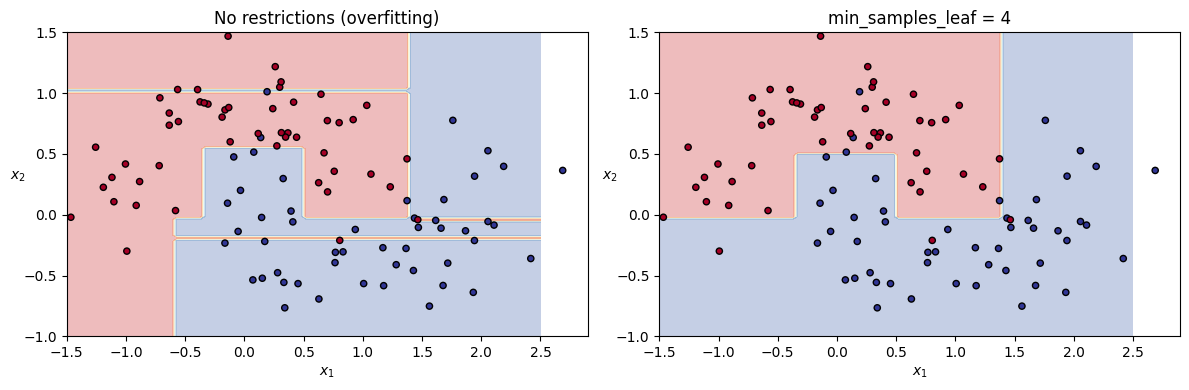

In [5]:
# Cell 6: Demonstrate regularization with moons dataset
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate moons dataset
X_moons, y_moons = make_moons(n_samples=100, noise=0.25, random_state=42)

# Train two trees: unregularized and regularized
tree_unreg = DecisionTreeClassifier(random_state=42)
tree_reg = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

tree_unreg.fit(X_moons, y_moons)
tree_reg.fit(X_moons, y_moons)

# Create function to plot decision boundaries
def plot_decision_boundary(clf, X, y, axes, title):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu,
                edgecolors='k', s=20)
    plt.title(title)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

# Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.sca(axes[0])
plot_decision_boundary(tree_unreg, X_moons, y_moons,
                      [-1.5, 2.5, -1, 1.5],
                      "No restrictions (overfitting)")
plt.sca(axes[1])
plot_decision_boundary(tree_reg, X_moons, y_moons,
                      [-1.5, 2.5, -1, 1.5],
                      "min_samples_leaf = 4")
plt.tight_layout()
plt.show()

# **7. Regression**
---
Decision Trees dapat digunakan untuk tugas regresi dengan memprediksi nilai rata-rata target di setiap leaf node.

Prediction for x1=0.6:
  max_depth=2: 0.111
  max_depth=3: 0.084


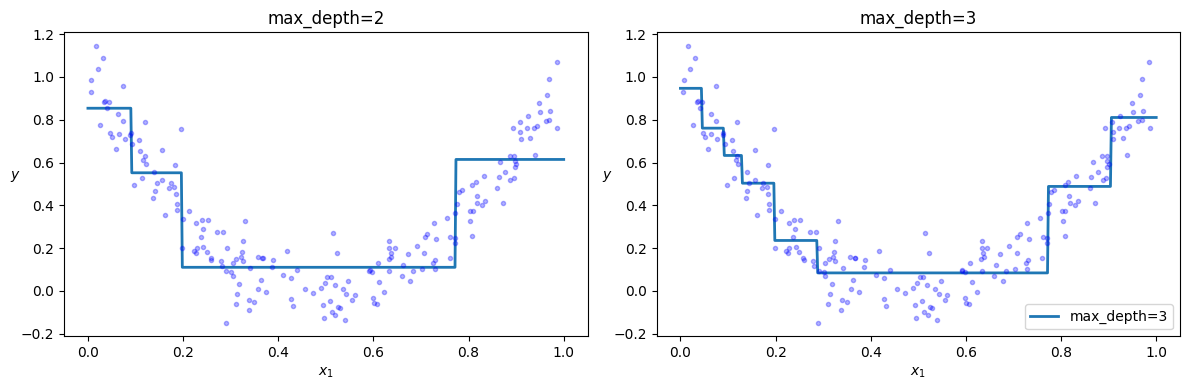

In [6]:
# Cell 7: Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

# Generate quadratic dataset with noise
np.random.seed(42)
m = 200
X_reg = np.random.rand(m, 1)
y_reg = 4 * (X_reg - 0.5) ** 2
y_reg = y_reg + np.random.randn(m, 1) / 10

# Train regression tree with max_depth=2
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X_reg, y_reg)

# Train another tree with max_depth=3
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X_reg, y_reg)

# Make prediction for x1 = 0.6
X_new = [[0.6]]
pred1 = tree_reg1.predict(X_new)
pred2 = tree_reg2.predict(X_new)
print(f"Prediction for x1=0.6:")
print(f"  max_depth=2: {pred1[0]:.3f}")
print(f"  max_depth=3: {pred2[0]:.3f}")

# Visualize predictions
def plot_regression_predictions(tree_reg, X, y, axes, label):
    X_test = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(X_test)
    plt.plot(X_test, y_pred, linewidth=2, label=label)
    plt.plot(X, y, "b.", alpha=0.3)
    plt.xlabel("$x_1$")
    plt.ylabel("$y$", rotation=0)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X_reg, y_reg, [0, 1], "max_depth=2")
plt.title("max_depth=2")
plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X_reg, y_reg, [0, 1], "max_depth=3")
plt.title("max_depth=3")
plt.legend()
plt.tight_layout()
plt.show()

# **8. Instability**
---
Decision Trees sensitif terhadap variasi kecil dalam data training dan rotasi dataset.

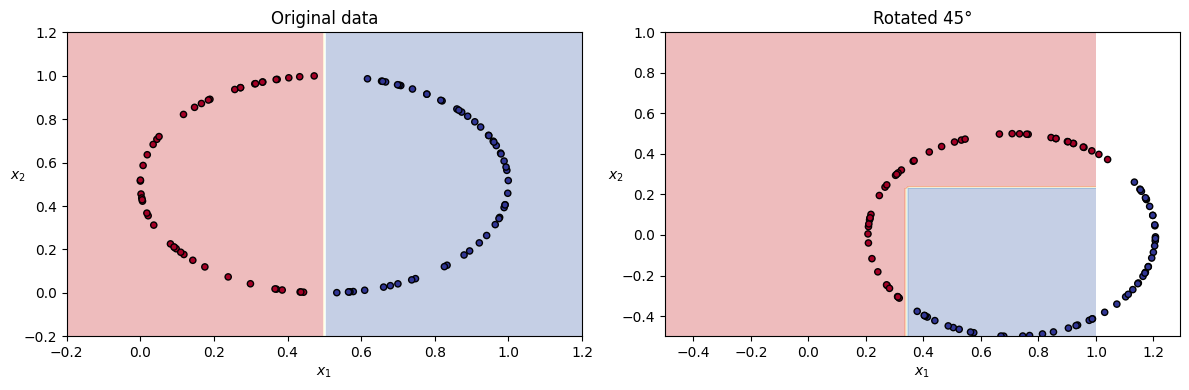

In [7]:
# Cell 8: Demonstrate sensitivity to rotation
from sklearn.decomposition import PCA

# Create simple linearly separable dataset
np.random.seed(42)
angles = np.random.rand(100) * 2 * np.pi
X1 = np.cos(angles) * 0.5 + 0.5
X2 = np.sin(angles) * 0.5 + 0.5
X_original = np.column_stack([X1, X2])
y_original = (X1 > 0.5).astype(int)

# Rotate the dataset by 45 degrees
theta = np.pi / 4
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                           [np.sin(theta), np.cos(theta)]])
X_rotated = X_original.dot(rotation_matrix)

# Train trees on both datasets
tree_original = DecisionTreeClassifier(random_state=42)
tree_rotated = DecisionTreeClassifier(random_state=42)

tree_original.fit(X_original, y_original)
tree_rotated.fit(X_rotated, y_original)

# Plot results
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.sca(axes[0])
plot_decision_boundary(tree_original, X_original, y_original,
                      [-0.2, 1.2, -0.2, 1.2],
                      "Original data")
plt.sca(axes[1])
plot_decision_boundary(tree_rotated, X_rotated, y_original,
                      [-0.5, 1.0, -0.5, 1.0],
                      "Rotated 45°")
plt.tight_layout()
plt.show()